<a href="https://colab.research.google.com/github/geez5/CustomersegmentationClustering/blob/main/customer_clustering_segmentation_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [23]:
# loading the data from csv files to a pandas dataframe
customer_data = pd.read_csv('/content/customer_segmentation_data.csv', encoding='latin1') # or 'ISO-8859-1'

In [24]:
# first 5 rows of the dataframe
customer_data.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08


In [25]:
#finding the number of rows and columns
customer_data.shape

(1000, 9)

In [26]:
# getting some information about the dataset
customer_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


In [27]:
#checking for missing values
customer_data.isnull().sum()

,0
id,0
age,0
gender,0
income,0
spending_score,0
membership_years,0
purchase_frequency,0
preferred_category,0
last_purchase_amount,0


In [28]:
# cleaning the data
df = pd.DataFrame(customer_data)
df_cleaned = df.dropna()

In [29]:
# check if the data  is cleaned
# Returns False if there are no null values left (i.e., the data is clean).
# Returns True if there are still some nulls.
print(df_cleaned.isnull().values.any())


False


In [31]:
customer_data = pd.read_csv('/content/customer_segmentation_data.csv', encoding='latin1')  # Corrected path
    # OR if the file is in the same directory as the notebook:
    # customer_data = pd.read_csv('marketing-campaign-checkpoint.csv', encoding='latin1')

In [35]:
X = customer_data[['income' ,'spending_score', 'membership_years', 'purchase_frequency',
'preferred_category']]

In [36]:
print(X)

     income  spending_score  membership_years  purchase_frequency  \
0     99342              90                 3                  24   
1     78852              60                 2                  42   
2    126573              30                 2                  28   
3     47099              74                 9                   5   
4    140621              21                 3                  25   
..      ...             ...               ...                 ...   
995  112170              57                 6                   1   
996   65337              76                10                  23   
997  113097              40                 5                  42   
998  113695              63                 7                  44   
999   90420               7                 2                  31   

    preferred_category  
0            Groceries  
1               Sports  
2             Clothing  
3        Home & Garden  
4          Electronics  
..                 ..

In [40]:
print("Original shape:", df.shape)

# Drop duplicate rows
df_unique = df.drop_duplicates()

# Print new shape after removing duplicates
print("Shape after removing duplicates:", df_unique.shape)


Original shape: (1000, 9)
Shape after removing duplicates: (1000, 9)


WCSS (choosing the number of clusters)

In [48]:
# Import the necessary class
from sklearn.preprocessing import StandardScaler

# Drop non-numeric columns (e.g., CustomerID or Name, if present)
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Now you can use StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

In [49]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

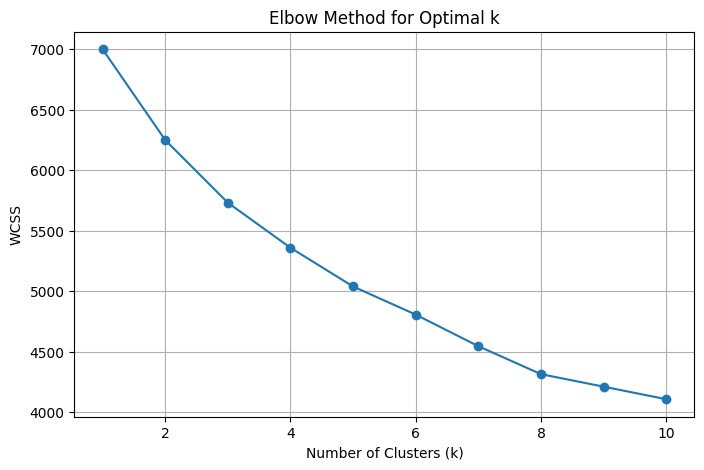

In [51]:
# Plot the Elbow Method to find optimal k
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

the sharpest bend/ elbow in the wcss curve occurs arounf k = 4
therefore, Optimum number of Clusters = 4

Training the K-Means clustering model

In [54]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to your original dataframe
df['Cluster'] = clusters


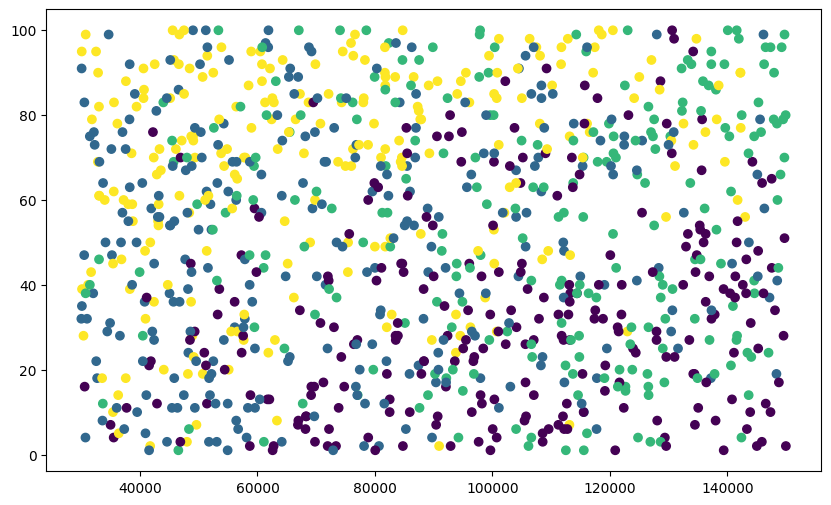

In [56]:
# plotting all the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['income'], df['spending_score'], c=df['Cluster'], cmap='viridis')

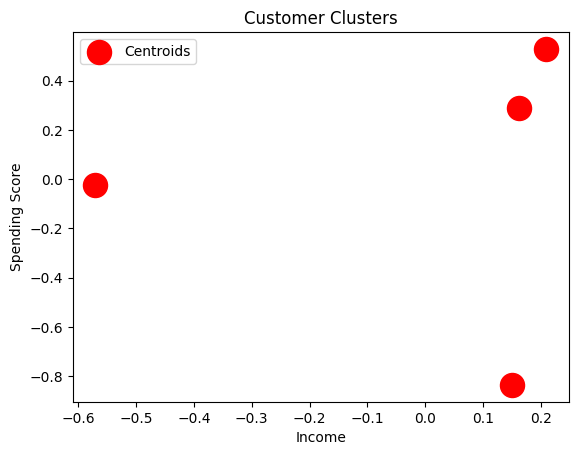

In [57]:
# plotting thier centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Customer Clusters')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

DBSCAN

In [59]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=4)
Y = agg.fit_predict(X_scaled)


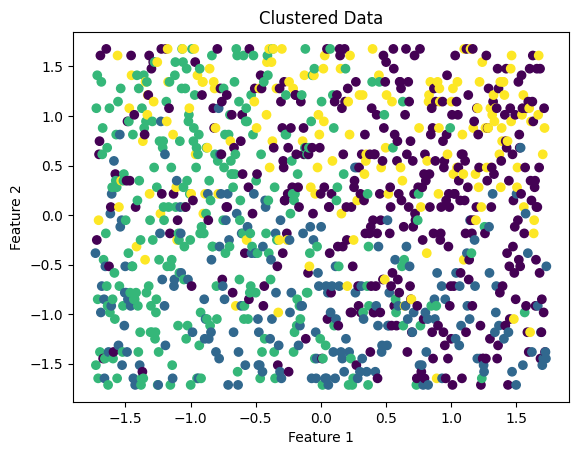

In [60]:
import matplotlib.pyplot as plt

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=Y, cmap='viridis')
plt.title('Clustered Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()



Hierarchical Clustering (Agglomerative)

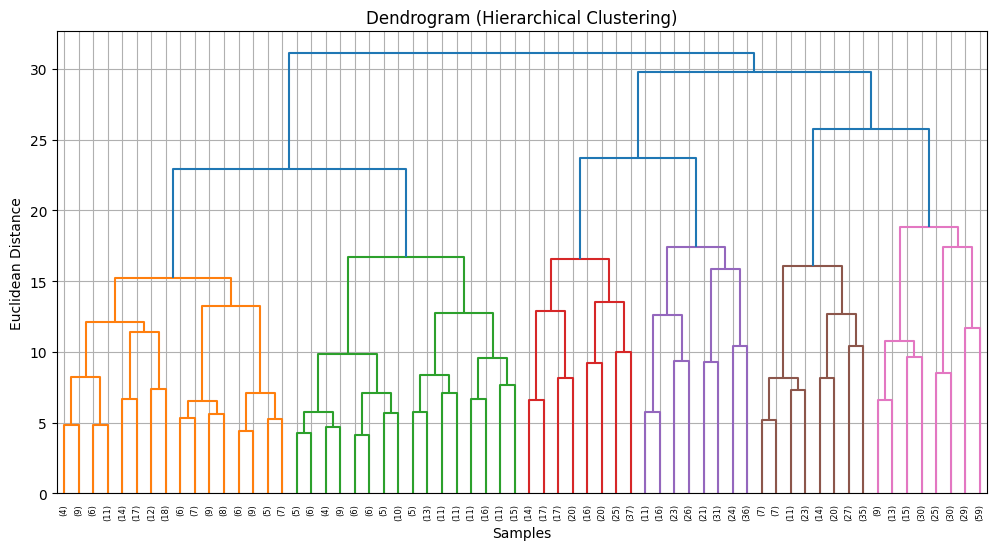

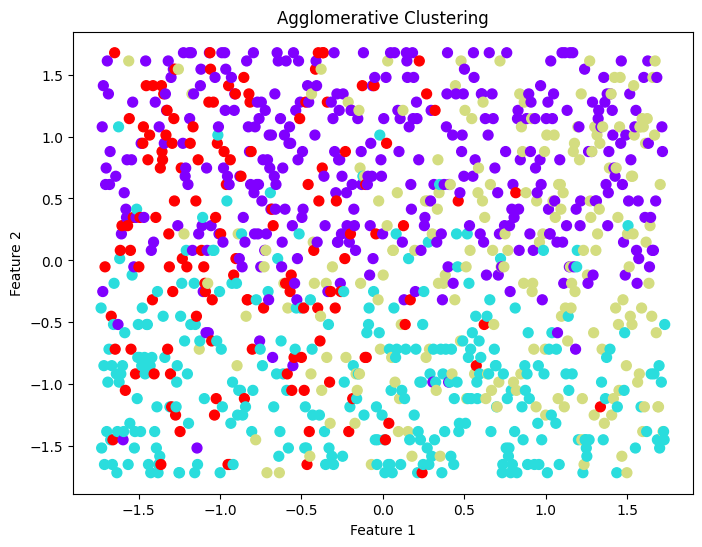

   id  age  gender  income  spending_score  membership_years  \
0   1   38  Female   99342              90                 3   
1   2   21  Female   78852              60                 2   
2   3   60  Female  126573              30                 2   
3   4   40   Other   47099              74                 9   
4   5   65  Female  140621              21                 3   

   purchase_frequency preferred_category  last_purchase_amount  Cluster  
0                  24          Groceries                113.53        1  
1                  42             Sports                 41.93        1  
2                  28           Clothing                424.36        0  
3                   5      Home & Garden                991.93        0  
4                  25        Electronics                347.08        0  
                 id        age        income  spending_score  \
Cluster                                                        
0        505.697740  54.771186  87397.46892

In [69]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Step 2: Load the dataset
df = pd.read_csv('/content/customer_segmentation_data.csv')

# Step 3: Drop duplicates
df = df.drop_duplicates()

# Step 4: Separate features
X = df.copy()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include='object').columns

# Step 5: Preprocessing (scale numeric + encode categorical)
scaler = StandardScaler()
X_scaled_numeric = scaler.fit_transform(X[numerical_features])

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded_categorical = encoder.fit_transform(X[categorical_features])

# Step 6: Combine all preprocessed features
X_processed = np.concatenate([X_scaled_numeric, X_encoded_categorical], axis=1)

# Step 7: Dendrogram to choose optimal number of clusters
linked = linkage(X_processed, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Dendrogram (Hierarchical Clustering)")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.grid()
plt.show()

# Step 8: Apply Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=4, linkage='ward')  # You can choose the number based on the dendrogram
Y = agg.fit_predict(X_processed)

# Step 9: Visualize clusters (if possible, based on top 2 PCA components or features)
plt.figure(figsize=(8, 6))
plt.scatter(X_processed[:, 0], X_processed[:, 1], c=Y, cmap='rainbow', s=50)
plt.title("Agglomerative Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Step 10: Add cluster labels to original dataframe
df['Cluster'] = Y
print(df.head())

# Optional: Check cluster-wise summary
print(df.groupby('Cluster').mean(numeric_only=True))


EDA

Dataset Shape: (1000, 9)

Data Types & Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB
None

First 5 Rows:
   id  age  gender  income  spending_score  membership_years  \
0   1   38  Female   99342              90                 3   
1   2   21  Female   78852              60                 2   
2  

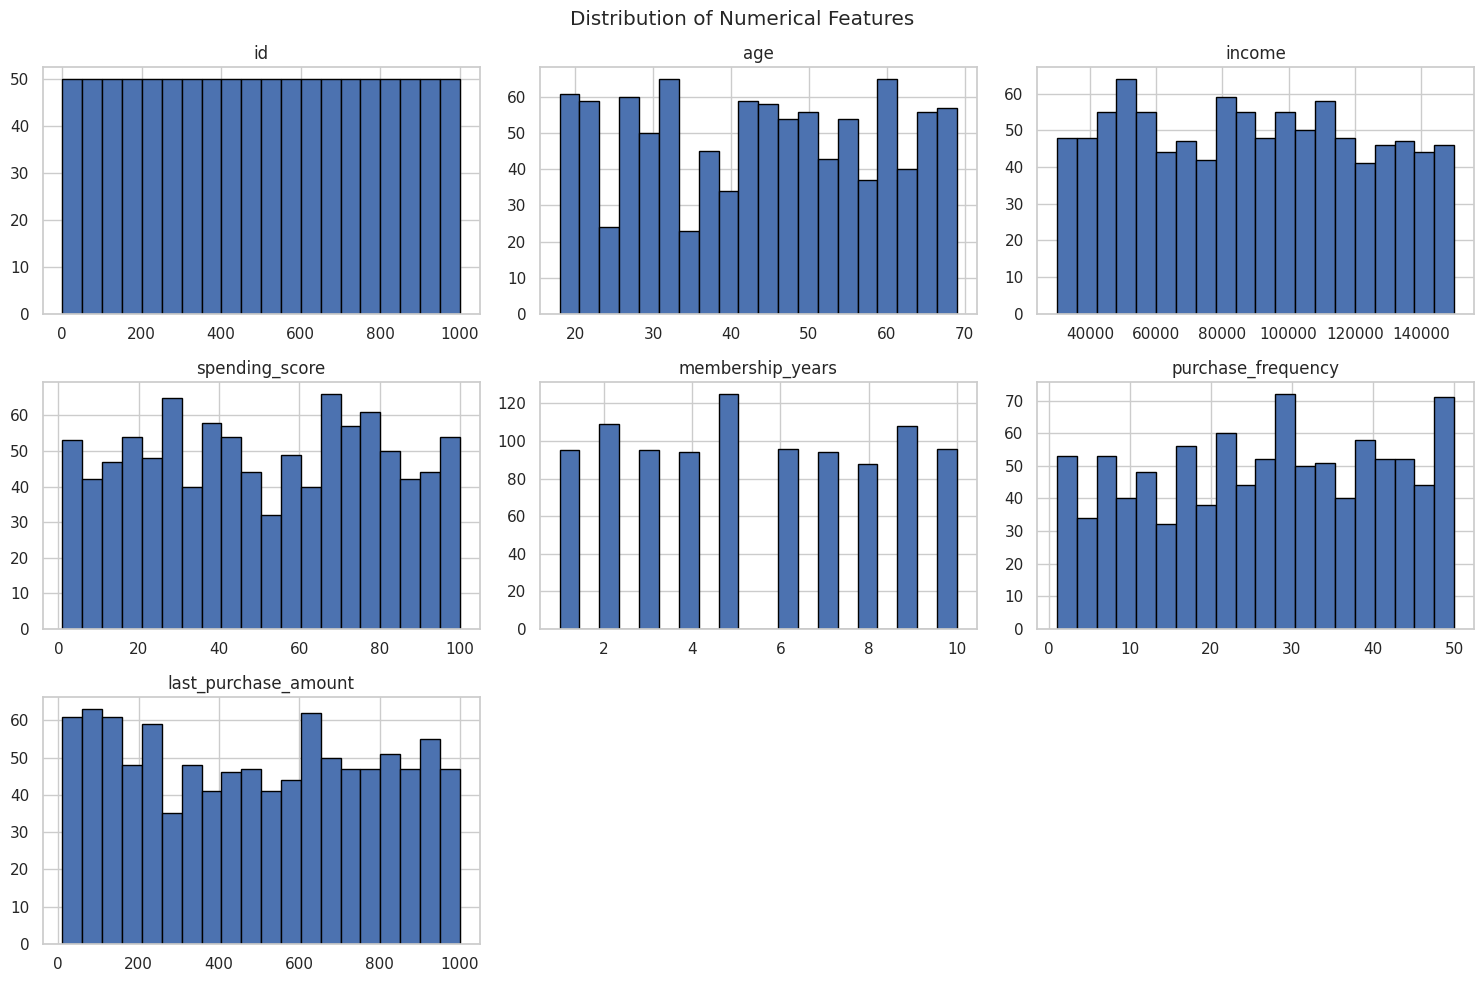

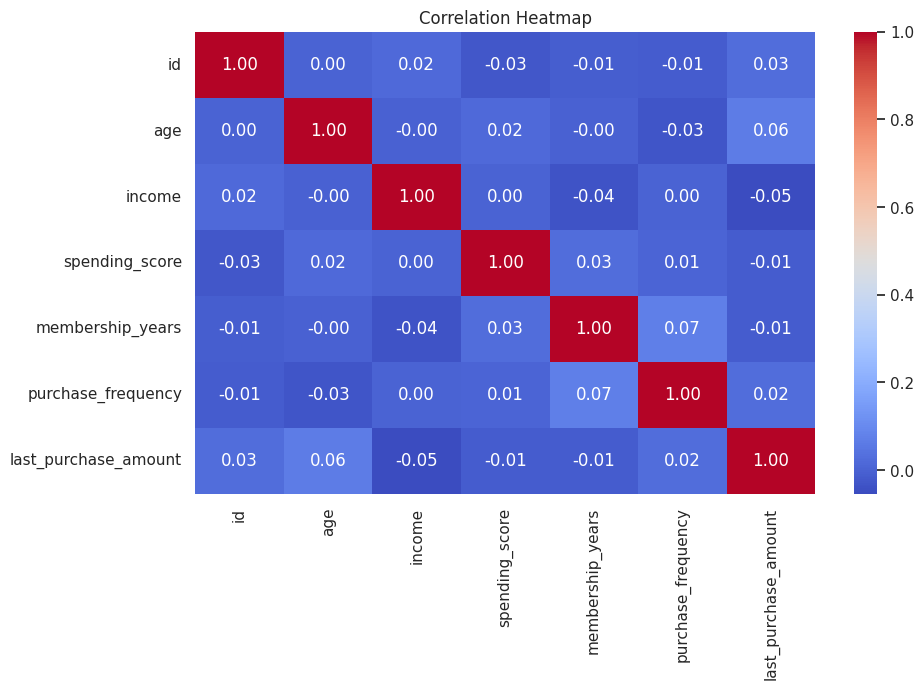

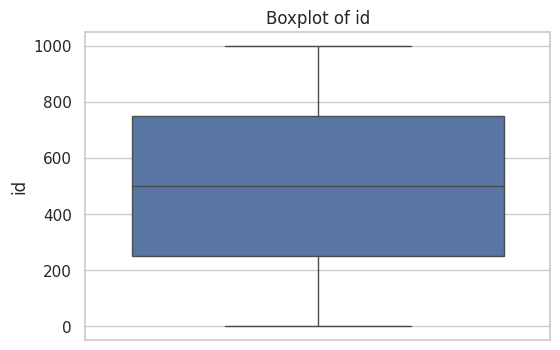

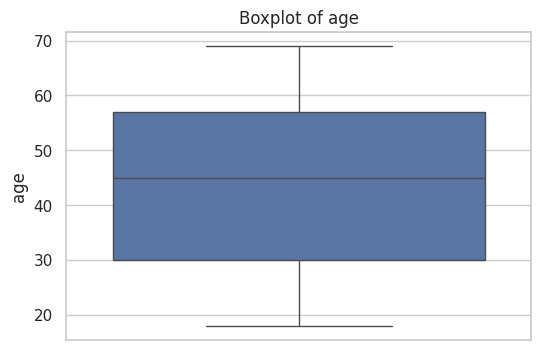

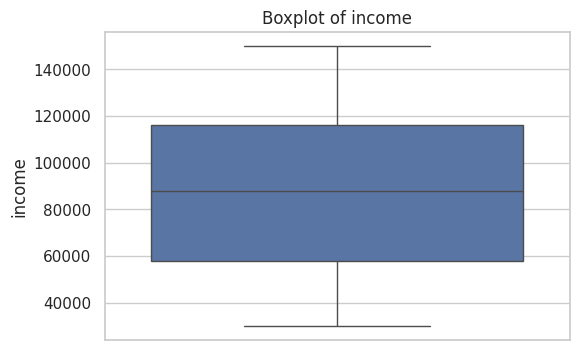

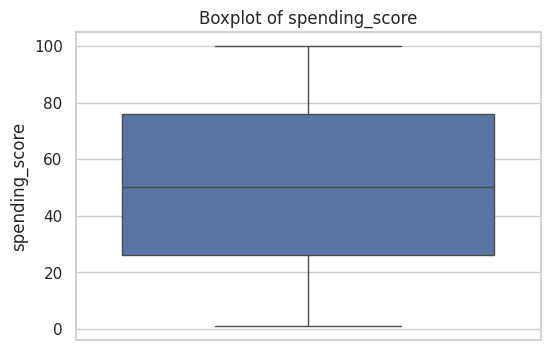

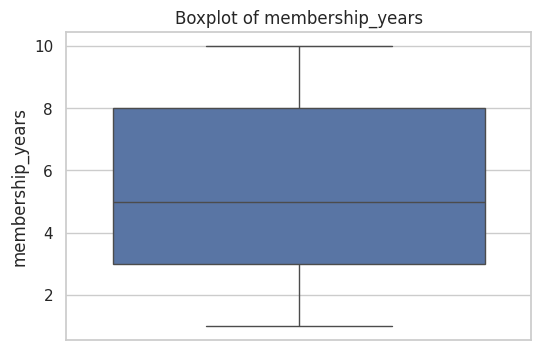

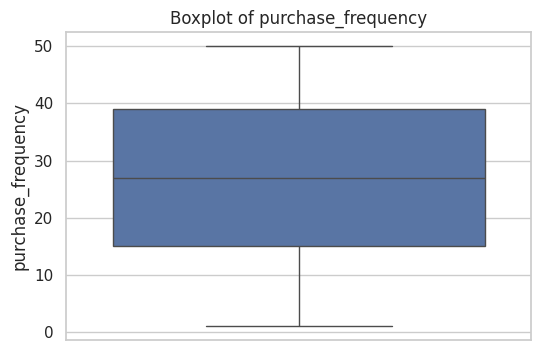

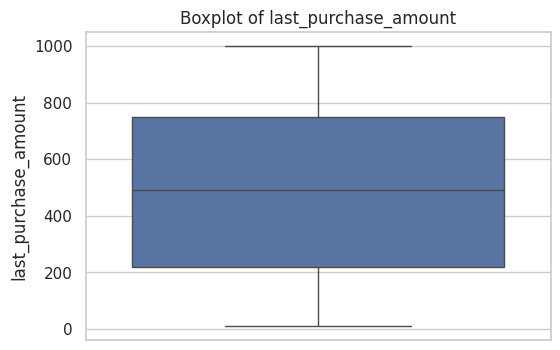

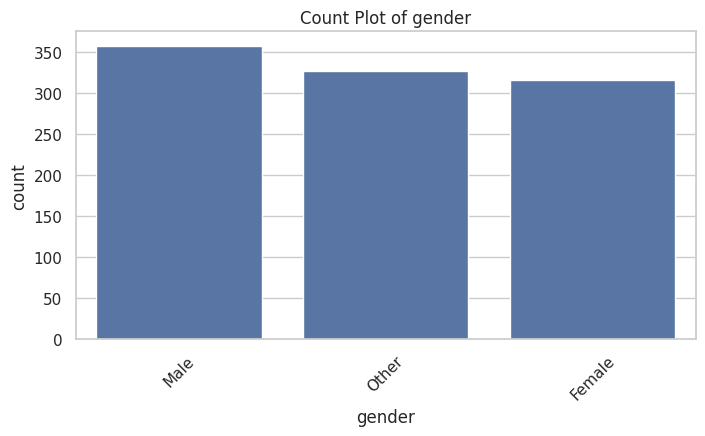

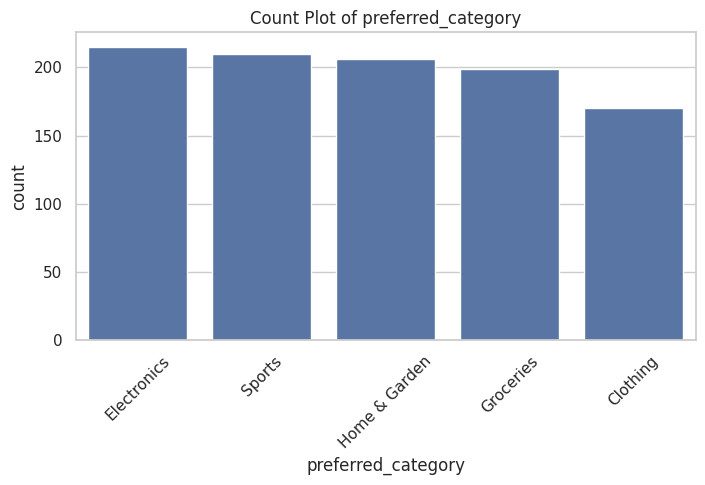

In [70]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Step 2: Load dataset
df = pd.read_csv('/content/customer_segmentation_data.csv')

# Step 3: Overview
print("Dataset Shape:", df.shape)
print("\nData Types & Non-Null Counts:")
print(df.info())
print("\nFirst 5 Rows:")
print(df.head())

# Step 4: Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Step 5: Duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Step 6: Descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe(include='all'))

# Step 7: Visualize numerical distributions
numeric_cols = df.select_dtypes(include=[np.number]).columns

df[numeric_cols].hist(bins=20, edgecolor='black', figsize=(15, 10))
plt.suptitle("Distribution of Numerical Features")
plt.tight_layout()
plt.show()

# Step 8: Correlation heatmap (numerical)
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Step 9: Boxplots to detect outliers
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, y=col)
    plt.title(f"Boxplot of {col}")
    plt.show()

# Step 10: Count plots for categorical features
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()

# Step 11: Pairplot (optional, for a small number of numeric features)
if len(numeric_cols) <= 5:
    sns.pairplot(df[numeric_cols])
    plt.suptitle("Pairwise Relationships", y=1.02)
    plt.show()


Gnerating Business Insights

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (update path if needed)
df = pd.read_csv('/content/customer_segmentation_data.csv')

# Show basic structure
print("✅ Dataset Shape:", df.shape)
print("\n📋 Columns:\n", df.columns)

# Clean the data
df = df.dropna()  # Drop missing values if any

# Display first few rows
print("\n🔍 Sample Data:\n")
print(df.head())

# -----------------------
# 1. Top Spending Customers
# -----------------------
if 'Spending Score (1-100)' in df.columns:
    print("\n💰 Top 5 Spending Customers:")
    print(df.sort_values(by='Spending Score (1-100)', ascending=False).head())

    plt.figure(figsize=(8, 5))
    sns.histplot(df['Spending Score (1-100)'], kde=True, bins=30)
    plt.title("Distribution of Spending Score")
    plt.xlabel("Spending Score (1-100)")
    plt.show()

# -----------------------
# 2. Age Distribution Insight
# -----------------------
if 'Age' in df.columns:
    print(f"\n🎂 Age Statistics:\n{df['Age'].describe()}")

    plt.figure(figsize=(8, 5))
    sns.histplot(df['Age'], kde=True, bins=30)
    plt.title("Age Distribution")
    plt.xlabel("Age")
    plt.show()

# -----------------------
# 3. Income Distribution Insight
# -----------------------
if 'Annual Income (k$)' in df.columns:
    print(f"\n💼 Annual Income Stats:\n{df['Annual Income (k$)'].describe()}")

    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, y='Annual Income (k$)')
    plt.title("Annual Income Distribution")
    plt.ylabel("Annual Income (k$)")
    plt.show()

# -----------------------
# 4. Gender-Based Spending Insights
# -----------------------
if 'Gender' in df.columns:
    print("\n👫 Average Spending Score by Gender:")
    print(df.groupby('Gender')['Spending Score (1-100)'].mean())

    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='Gender', y='Spending Score (1-100)')
    plt.title("Spending Score by Gender")
    plt.show()

# -----------------------
# 5. Age vs Income Segmentation
# -----------------------
if 'Age' in df.columns and 'Annual Income (k$)' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='Age', y='Annual Income (k$)', hue='Gender')
    plt.title("Age vs Annual Income (Colored by Gender)")
    plt.show()

# -----------------------
# 6. Income vs Spending Score Segmentation
# -----------------------
if 'Annual Income (k$)' in df.columns and 'Spending Score (1-100)' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
    plt.title("Income vs Spending Score (Colored by Gender)")
    plt.show()


✅ Dataset Shape: (1000, 9)

📋 Columns:
 Index(['id', 'age', 'gender', 'income', 'spending_score', 'membership_years',
       'purchase_frequency', 'preferred_category', 'last_purchase_amount'],
      dtype='object')

🔍 Sample Data:

   id  age  gender  income  spending_score  membership_years  \
0   1   38  Female   99342              90                 3   
1   2   21  Female   78852              60                 2   
2   3   60  Female  126573              30                 2   
3   4   40   Other   47099              74                 9   
4   5   65  Female  140621              21                 3   

   purchase_frequency preferred_category  last_purchase_amount  
0                  24          Groceries                113.53  
1                  42             Sports                 41.93  
2                  28           Clothing                424.36  
3                   5      Home & Garden                991.93  
4                  25        Electronics                3